## Random Forest Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
rows, columns = dataset.shape
# We specify [:, 1:2] instead of just [:,1] because we want X to be a matrix and not just a vector of values
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, (columns - 1)].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Checking out the values of X and y
print("X Values")
print(X[:5])
print("\nY Values")
print(y[:5])

X Values
[[1]
 [2]
 [3]
 [4]
 [5]]

Y Values
[ 45000  50000  60000  80000 110000]


Note : We are not going to split the data into training set and test set
because we do not have too much data to make this division and we need to
make a very accurate prediction.

In [5]:
# Fitting Random Forest Regressor to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [6]:
# Predicting a new result for 6.5 level employee
y_pred = regressor.predict(6.5)
print(y_pred)

[ 160333.33333333]


The employee mentioned that his salary was 160,000. The prediciton is pretty close to the actual salary.

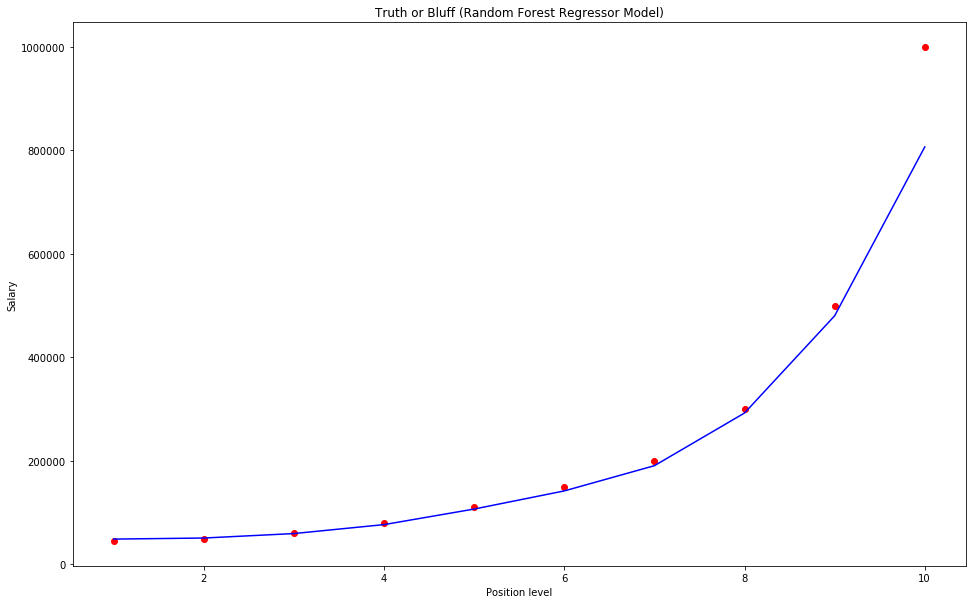

In [7]:
# Visualising the Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regressor Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In the above graph we can see there is something wrong. According to the decision tree regression we need to get the average of all points within an interval and we will use that average to predict 'y'. Now Random forest is a combiniation of many descision trees. So we need to get an average over lots of decision tree predicitons. Sooo Here is looks more like a continous plot of points between the intervals. It needs to be a discrete not continous. 

To enable this and view the graph correctly we need to increase the resolution of the graph.

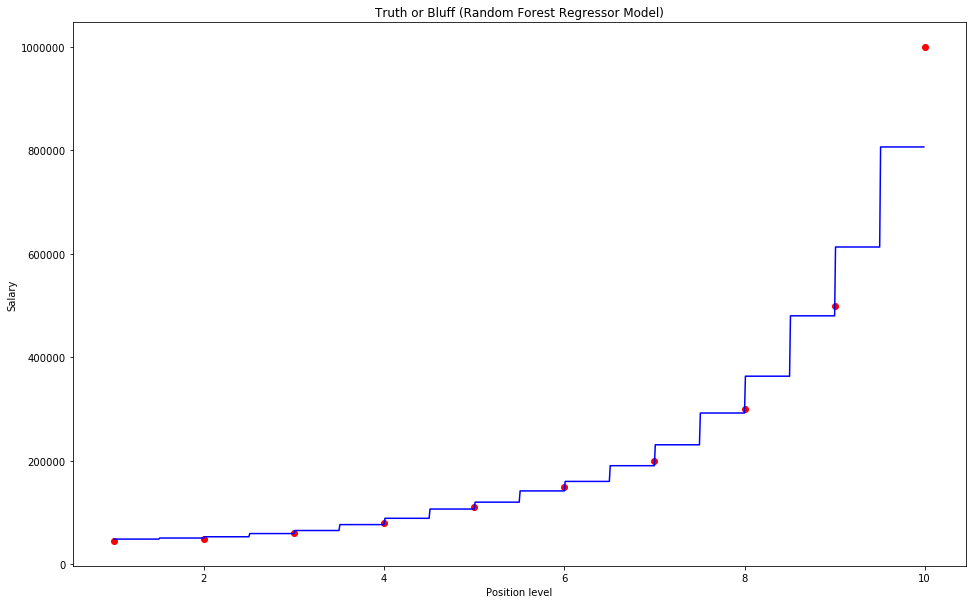

In [8]:
# Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regressor Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

So as we can see in the above graph it is more discrete and the prediction values are an average of all decision tree predictions over an interval.